# PROYECTO 2 _ BIRDS

# 1. Direct Prediction

# Carga de las imágenes X

In [2]:
import os
import re
from scipy import ndimage, misc

images = []
for root, dirnames, filenames in os.walk('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/birds/train'):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = ndimage.imread(filepath, mode="RGB")
            image_resized = misc.imresize(image, (224, 224))
            images.append(image_resized)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
len(images)

300

In [4]:
images[2]

array([[[ 5,  5,  2],
        [ 5,  6,  1],
        [ 6,  7,  3],
        ...,
        [ 7,  7,  2],
        [11,  8,  4],
        [12,  7,  4]],

       [[ 5,  5,  2],
        [ 6,  6,  1],
        [ 6,  7,  3],
        ...,
        [ 5,  6,  2],
        [10,  6,  3],
        [13,  8,  5]],

       [[ 5,  6,  3],
        [ 5,  6,  1],
        [ 5,  5,  2],
        ...,
        [ 8,  6,  2],
        [12,  8,  3],
        [18, 12,  7]],

       ...,

       [[40, 39, 11],
        [41, 38, 12],
        [42, 38, 13],
        ...,
        [57, 52, 30],
        [60, 56, 32],
        [64, 59, 37]],

       [[42, 41, 12],
        [42, 39, 12],
        [41, 38, 12],
        ...,
        [53, 48, 26],
        [52, 47, 25],
        [56, 51, 29]],

       [[42, 39, 13],
        [42, 38, 13],
        [41, 37, 13],
        ...,
        [49, 44, 22],
        [50, 45, 23],
        [53, 48, 27]]], dtype=uint8)

In [5]:
images[2].shape

(224, 224, 3)

In [6]:
from matplotlib import pyplot as plt
plt.imshow(images[1])

# Creación de la variable Y.  

In [7]:
import numpy as np
y_training=np.array([[1,0,0,0,0,0],]*50)
m2=np.array([[0,1,0,0,0,0],]*50)
m3=np.array([[0,0,1,0,0,0],]*50)
m4=np.array([[0,0,0,1,0,0],]*50)
m5=np.array([[0,0,0,0,1,0],]*50)
m6=np.array([[0,0,0,0,0,1],]*50)

In [11]:
y_training=np.concatenate((y_training,m2,m3,m4,m5,m6))
y_training.shape

(550, 6)

# La codificación de la matrix 'y' es:


# [egret, mandarin, owl, puffin, toucan, wood_duck]

In [9]:
y_training

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

# Vamos a utilizar el modelo VGG16

In [12]:
from keras.applications.vgg16 import VGG16
model_vgg=VGG16(weights='imagenet')
print(model_vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Probamos el modelo inicialmente con una imagen

In [13]:
from keras.preprocessing.image import load_img, img_to_array

In [14]:
path_image='C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/birds/train/egr026'

In [15]:
image=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/birds/train/egr029.jpg',target_size=(224,224))

In [16]:
image=img_to_array(image)
image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))

In [17]:
image.shape

(1, 224, 224, 3)

In [18]:
from keras.applications.vgg16 import preprocess_input
image=preprocess_input(image)

In [19]:
y_hat=model_vgg.predict(image)

In [20]:
y_hat

array([[1.53708601e-10, 6.00999472e-09, 8.37389269e-10, 4.08441891e-10,
        2.05621493e-08, 6.51402710e-09, 3.01588265e-09, 1.40053285e-08,
        1.07490568e-08, 5.52182016e-08, 3.38538730e-09, 5.33514255e-09,
        4.94148056e-09, 9.14302145e-09, 4.35087166e-09, 6.61630484e-09,
        1.95592897e-09, 2.24218013e-07, 1.18163037e-07, 1.25531230e-08,
        4.21888586e-08, 6.17374244e-05, 2.32779039e-05, 3.89122448e-07,
        1.35945953e-07, 8.71376374e-11, 8.49830262e-10, 1.47300561e-10,
        1.17921284e-10, 2.84001977e-09, 7.35625394e-10, 2.71913256e-11,
        1.04813311e-11, 2.99067687e-10, 9.48292417e-11, 1.95023581e-10,
        3.55512897e-10, 4.12233615e-11, 3.83771591e-11, 4.31227026e-10,
        1.54121063e-10, 1.64582223e-10, 2.60494487e-10, 2.33181724e-10,
        1.38589829e-09, 5.32530617e-11, 7.96984589e-10, 3.63402586e-10,
        1.20077004e-10, 6.75881351e-10, 1.67451208e-08, 3.76968984e-10,
        9.74794467e-10, 3.68004272e-09, 7.65361385e-10, 8.000123

In [21]:
y_hat.shape

(1, 1000)

In [22]:
from keras.applications.vgg16 import decode_predictions
label=decode_predictions(y_hat)
label=label[0][0]

In [23]:
print('%s (%.2f%%)' %(label[1],label[2]*100))

American_egret (99.39%)


# Predicciones de todas las imágenes


In [24]:
full_images=[]
for i in range(len(images)):
    full_images.append(images[i].reshape((1,images[i].shape[0],images[i].shape[1],images[i].shape[2])))
    

In [25]:
len(full_images)

300

In [26]:
full_images[4].shape

(1, 224, 224, 3)

In [27]:
for j in range(len(full_images)):
    full_images[j]=preprocess_input(full_images[j])

In [28]:
len(full_images)

300

In [29]:
y_hats=[]
for k in range(len(full_images)):
    y_hats.append(model_vgg.predict(full_images[k]))

In [30]:
len(y_hats)

300

In [31]:
labels=[]
for h in range(len(y_hats)):
    labels.append(decode_predictions(y_hats[h]))
    labels[h]=labels[h][0][0]

In [32]:
len(labels)

300

In [33]:
final_prediction=[]
for l in range(len(labels)):
    final_prediction.append('%s (%.2f%%)' %(labels[l][1],labels[l][2]*100))

In [34]:
len(final_prediction)

300

In [35]:
final_prediction

['American_egret (80.76%)',
 'American_egret (88.78%)',
 'American_egret (93.69%)',
 'American_egret (85.89%)',
 'American_egret (92.36%)',
 'American_egret (90.29%)',
 'American_egret (97.59%)',
 'American_egret (89.67%)',
 'American_egret (96.43%)',
 'American_egret (90.03%)',
 'American_egret (84.46%)',
 'American_egret (82.20%)',
 'American_egret (76.53%)',
 'American_egret (73.86%)',
 'American_egret (80.82%)',
 'American_egret (98.86%)',
 'American_egret (45.38%)',
 'American_egret (90.51%)',
 'American_egret (90.34%)',
 'American_egret (83.50%)',
 'American_egret (70.51%)',
 'spoonbill (45.86%)',
 'American_egret (90.93%)',
 'American_egret (46.55%)',
 'American_egret (90.24%)',
 'American_egret (70.16%)',
 'American_egret (58.90%)',
 'American_egret (87.56%)',
 'American_egret (99.73%)',
 'American_egret (84.36%)',
 'American_egret (85.25%)',
 'American_egret (83.51%)',
 'American_egret (83.39%)',
 'American_egret (70.07%)',
 'American_egret (98.60%)',
 'American_egret (97.26%)

In [36]:
final_prediction2=[]
for l in range(len(labels)):
    final_prediction2.append(labels[l][1])

In [37]:
len(final_prediction2)

300

In [38]:
from collections import Counter
Counter(final_prediction2)

Counter({'American_egret': 48,
         'spoonbill': 2,
         'little_blue_heron': 1,
         'drake': 84,
         'anemone_fish': 6,
         'partridge': 1,
         'toucan': 62,
         'goldfish': 1,
         'greenhouse': 1,
         'chickadee': 1,
         'chambered_nautilus': 1,
         'goose': 3,
         'flamingo': 2,
         'peacock': 1,
         'ptarmigan': 26,
         'sulphur-crested_cockatoo': 2,
         'kite': 4,
         'hen': 4,
         'terrapin': 1,
         'saltshaker': 1,
         'meerkat': 1,
         'African_grey': 2,
         'prairie_chicken': 2,
         'red-backed_sandpiper': 1,
         'great_grey_owl': 2,
         'Indian_cobra': 1,
         'book_jacket': 1,
         'cheetah': 1,
         'marmot': 1,
         'magpie': 5,
         'king_penguin': 4,
         'black_stork': 5,
         'oystercatcher': 7,
         'black_grouse': 4,
         'albatross': 5,
         'bald_eagle': 1,
         'water_ouzel': 1,
         'ladybug': 1

# Las 9 clases de aves más frecuentes en las predicciones son:

drake': 84

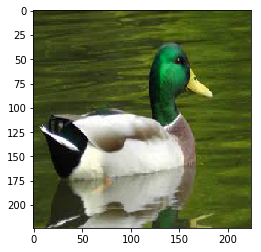

In [39]:
drake=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/drake.jpg',target_size=(224,224))
plt.imshow(drake)

toucan': 62

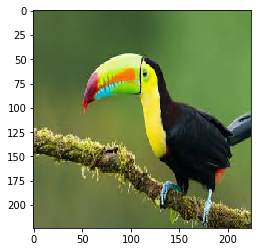

In [40]:
toucan=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/toucan.jpg',target_size=(224,224))
plt.imshow(toucan)

American_egret': 48

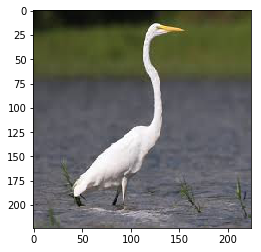

In [41]:
American_egret=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/american_egret.jpg',target_size=(224,224))
plt.imshow(American_egret)

ptarmigan': 26

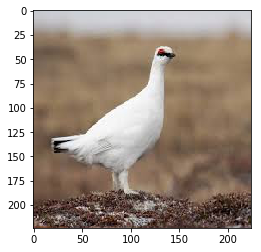

In [42]:
ptarmigan=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/ptarmigan.jpg',target_size=(224,224))
plt.imshow(ptarmigan)

oystercatcher': 7

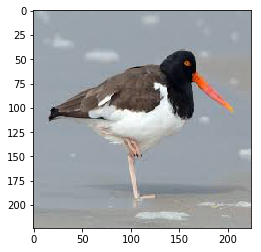

In [43]:
oystercatcher=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/oystercatcher.jpg',target_size=(224,224))
plt.imshow(oystercatcher)

anemone_fish': 6

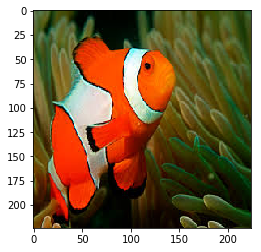

In [44]:
anemone_fish=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/anemone_fish.jpg',target_size=(224,224))
plt.imshow(anemone_fish)

magpie': 5

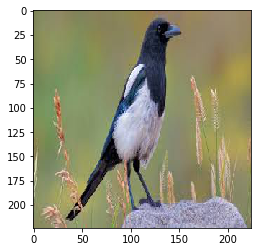

In [45]:
magpie=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/magpie.jpg',target_size=(224,224))
plt.imshow(magpie)

black_stork': 5

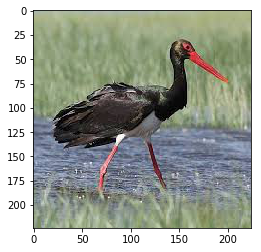

In [46]:
black_stork=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/black_stork.jpg',target_size=(224,224))
plt.imshow(black_stork)

albatross': 5

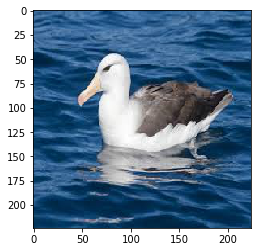

In [47]:
albatross=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/albatross.jpg',target_size=(224,224))
plt.imshow(albatross)

Hay 4 clases de animales más que tienen 4 predicciones cada una. Por eso, solo presentamos las 9 más frecuentes.

# Para construir la matrix de confunsión, primero vamos a relacionar las imágenes provenientes de 'Imagenet' con las imágenes de nuestra base 'birds':

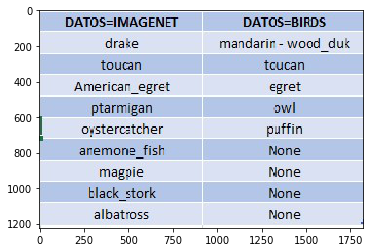

In [48]:
table=load_img('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/table.jpg',target_size=(1224,1824))
plt.imshow(table)

Se observa en las predicciones que el modelo no distingue entre las aves mandarin y wood_duck a las cuales denomina drake. Así mismo, no distingue owl el cual identifica como ptarrigan. Finalmente, el ave puffin está  muy mal identificada, lo más cercano en la predicción es el oystercatcher.

    Vamos a codificar nuestras clases de aves para crear el array de y_true: 

egret=1, mandarin=2, owl=3, puffin=4, toucan=5 y wood_duck=2

Nuestras imágenes han sido organizadas de tal manera que hay 50 imágenes de cada una en el orden anterior.por lo tanto, el array queda así:

In [49]:
y_true=[1]*50 # egret
y_true.extend([2]*50) # mandarin
y_true.extend([3]*50) # owl
y_true.extend([4]*50) # puffin
y_true.extend([5]*50) # toucan
y_true.extend([6]*50) # wood_luck

In [50]:
y_true

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [51]:
len(y_true)

300

Ahora vamos a construir manualmente la matriz de predicciones codificada:

In [52]:
y_predicciones=[0]*300

In [53]:
for i in range(len(final_prediction2)):
    if final_prediction2[i]=='American_egret':
        y_predicciones[i]=1
    elif final_prediction2[i]=='drake':
        y_predicciones[i]=2
    elif final_prediction2[i]=='ptarmigan':
        y_predicciones[i]=3
    elif final_prediction2[i]=='oystercatcher':
        y_predicciones[i]=4
    elif final_prediction2[i]=='toucan':
        y_predicciones[i]=5
    elif final_prediction2[i]=='wood_duck':
        y_predicciones[i]=6    
    else:
        y_predicciones[i]=88

In [54]:
y_predicciones

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 88,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 88,
 1,
 2,
 2,
 2,
 2,
 88,
 2,
 88,
 5,
 2,
 2,
 88,
 2,
 88,
 2,
 2,
 2,
 88,
 88,
 88,
 2,
 5,
 88,
 2,
 2,
 2,
 2,
 2,
 2,
 88,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 88,
 2,
 2,
 88,
 88,
 5,
 5,
 2,
 88,
 2,
 88,
 2,
 2,
 3,
 88,
 3,
 88,
 88,
 3,
 3,
 88,
 88,
 3,
 3,
 88,
 88,
 3,
 88,
 3,
 3,
 3,
 3,
 88,
 88,
 3,
 3,
 3,
 88,
 3,
 88,
 88,
 3,
 3,
 88,
 3,
 3,
 3,
 88,
 88,
 88,
 3,
 3,
 3,
 88,
 88,
 88,
 88,
 88,
 88,
 3,
 88,
 3,
 88,
 5,
 88,
 2,
 88,
 5,
 2,
 5,
 88,
 88,
 2,
 5,
 88,
 4,
 88,
 88,
 5,
 88,
 88,
 3,
 4,
 4,
 88,
 2,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 4,
 88,
 88,
 2,
 88,
 88,
 4,
 2,
 88,
 2,
 88,
 88,
 4,
 4,
 5,
 88,
 88,
 5,
 88,
 88,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,

In [55]:
len(y_predicciones),type(y_predicciones)

(300, list)

In [56]:
from sklearn.metrics import confusion_matrix

labels=['egret','mandarin','owl','puffin','toucan','wood_duck','others']

model1_CM=confusion_matrix(y_true,y_predicciones)

In [59]:
print(model1_CM)

[[48  0  0  0  0  0  2]
 [ 0 32  0  0  4  0 14]
 [ 0  0 25  0  0  0 25]
 [ 0  7  1  7  7  0 28]
 [ 0  0  0  0 50  0  0]
 [ 0 45  0  0  1  0  4]
 [ 0  0  0  0  0  0  0]]


Los resultados de la matriz de confusión muestra lo siguiente:

El modelo predice 48 egrets de los 50. Los otros dos los identifica como 'otros animales'. Para el caso de los mandarin (que en Imagenet son drake) predice correctamente 32. 4 los predice como 'toucans' y 14 como otros.

De los owls, como se mencionó anteriormente, el modelo los identifica como 'ptarmigan', de los cuales identifica 25 correctamente y 25 como otros animales.

Las predicciones de los puffin (relacionados con los 'oystercacher') son malas. Predice 7 como puffin, 7 como toucans, 1 como owl y 7 como mandarin. 25 puffins los identifica como otros animales.

Los tucanes (toucans) tienen predicción perfecta. los 50 los predice bien.

Finalmente, los wood_duck no son identificados por el modelo.Principalmente los predice como drakes, como los mandarin. 

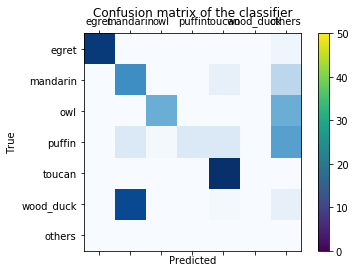

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model1_CM)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.imshow(model1_CM, cmap='Blues',interpolation='nearest')
plt.show()


# 2. Transfering Learning

Vamos a utilizar para Transfering Learning el modelo VGG16 el cual vamos a importar sin la capa final

In [123]:
from keras.applications import VGG16
 
model2_vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

print(model2_vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Cargamos las imágenes para training y para test.

In [63]:
import os
import re
from scipy import ndimage, misc

train_images = []
for root, dirnames, filenames in os.walk('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/birds/train'):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image_tr = ndimage.imread(filepath, mode="RGB")
            image_tr_resized = misc.imresize(image_tr, (224, 224))
            train_images.append(image_tr_resized)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [64]:
len(train_images)

300

In [90]:
train_images = np.stack(train_images)


In [91]:
train_images.shape

(300, 224, 224, 3)

In [156]:
test_images = []
for root, dirnames, filenames in os.walk('C:/AAndres/Maestria Analytics/Semestre Vacaciones/Deep Learning/Proyecto 2/birds/test'):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image_ts = ndimage.imread(filepath, mode="RGB")
            image_ts_resized = misc.imresize(image_ts, (224, 224))
            test_images.append(image_ts_resized)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\PIL\TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\andres\.anaconda\nav

In [148]:
test_images = np.stack(test_images)
test_images.shape

(300, 224, 224, 3)

# Creación de las variables y_training y y_test

In [79]:
import numpy as np
y_training=np.array([[1,0,0,0,0,0],]*50) #egret
m2=np.array([[0,1,0,0,0,0],]*50) #mandarin
m3=np.array([[0,0,1,0,0,0],]*50) #owl
m4=np.array([[0,0,0,1,0,0],]*50) #puffin
m5=np.array([[0,0,0,0,1,0],]*50) #toucan
m6=np.array([[0,0,0,0,0,1],]*50) #wood_duck

y_training=np.concatenate((y_training,m2,m3,m4,m5,m6))
y_training.shape

(300, 6)

In [80]:
y_test=np.array([[1,0,0,0,0,0],]*50) #egret
l2=np.array([[0,1,0,0,0,0],]*50) #mandarin
l3=np.array([[0,0,1,0,0,0],]*50) #owl
l4=np.array([[0,0,0,1,0,0],]*50) #puffin
l5=np.array([[0,0,0,0,1,0],]*50) #toucan
l6=np.array([[0,0,0,0,0,1],]*50) #wood_duck

y_test=np.concatenate((y_test,l2,l3,l4,l5,l6))
y_test.shape

(300, 6)

# Ahora vamos a terminar de crear el modelo

Del modelo VGG16 no queremos entrenar los 5 primeros layers, por lo que vamos a congelarlas:

In [81]:
for layer in model2_vgg.layers[:5]:
    layer.trainable = False

Ahora vamos a adicionar nuestras capas adicionales:

In [82]:
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D


transf_model = model2_vgg.output
transf_model=Flatten()(transf_model)
transf_model=Dense(256, activation="relu")(transf_model)
transf_model=Dropout(0.5)(transf_model)
transf_predictions=Dense(6, activation="sigmoid")(transf_model)


In [83]:
full_transf_model=Model(input=model2_vgg.input, output=transf_predictions)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [84]:
full_transf_model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

# Con el modelo creado, vamos a ajustar los datos de entrada para que tengan la forma requerida por el modelo

In [85]:
train_images.shape, y_training.shape

((300, 224, 224, 3), (300, 6))

In [86]:
full_transf_model.fit(train_images,y_training,batch_size=60,epochs=2,verbose=1)

Epoch 1/2
300/300 [==============================] - 536s 2s/step - loss: 7.3274 - acc: 0.1833
Epoch 2/2
300/300 [==============================] - 513s 2s/step - loss: 8.6940 - acc: 0.1667


In [87]:
y_predictions_2 = full_transf_model.predict(test_images)

In [88]:
y_predictions_2.shape

(300, 6)

In [89]:
y_predictions_2[50:200]

array([[1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [1.

Se observa que las predicciones no han sido buenas. Se probaron varios parámetros para mejorar el desempeño pero no se obtuvieron buenos resultados. Ahora hacemos la matriz de confusión.

In [120]:
score_transfer=full_transf_model.evaluate(test_images,y_test)
print(score_transfer)

300/300 [==============================] - 225s 748ms/step
[8.608353932698568, 0.16666666666666666]


# 3. Fine tuning

Ahora vamos a ajustar el modelo anterior pero permitiendo que los layers sean entrenados

In [112]:
from keras.applications import VGG16
 
model_ft_vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

print(model_ft_vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [113]:
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Activation,Flatten,Convolution2D,MaxPooling2D


ft_model = model_ft_vgg.output
ft_model=Flatten()(ft_model)
ft_model=Dense(256, activation="relu")(ft_model)
ft_model=Dropout(0.5)(ft_model)
ft_predictions=Dense(6, activation="sigmoid")(ft_model)

In [114]:
full_ft_model=Model(input=model_ft_vgg.input, output=ft_predictions)

C:\Users\andres\.anaconda\navigator\Anaconda_\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [115]:
full_ft_model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [116]:
full_ft_model.fit(train_images,y_training,batch_size=60,epochs=2,verbose=1)

Epoch 1/2
300/300 [==============================] - 647s 2s/step - loss: 5.1284 - acc: 0.1633
Epoch 2/2
300/300 [==============================] - 642s 2s/step - loss: 4.4931 - acc: 0.1667


In [117]:
y_predictions_ft = full_ft_model.predict(test_images)

In [119]:
y_predictions_ft

array([[1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1.],
       ...,
       [1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0., 1.]], dtype=float32)

In [121]:
score_ft=full_ft_model.evaluate(test_images,y_test)
print(score_ft)

300/300 [==============================] - 225s 751ms/step
[4.0275474802653, 0.16666666666666666]


Igual que en el modelo de transfer learning, este modelo realiza predicciones incorrectas que no justifican realizar matriz de confusión dado que tiene la misma predicción para cada imagen de test. 

# FIN CODE